In [81]:
import pandas as pd
import re
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

<h2> Data clean-up

In [82]:
df = pd.read_csv('../data/polo_data.csv',sep=';')
print(len(df))
df.head()

800


,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type
0,269.900 kr.,2020,29000,2020-09-10,Benzin,19.0,200,A
1,214.900 kr.,2022,6000,2022-04-27,Benzin,23.3,95,M
2,134.500 kr.,2014,126500,2013-11-11,Benzin,13.3,220,M
3,349.900 kr.,2022,8000,2022-06-03,Benzin,17.5,207,A
4,209.900 kr.,2018,73000,2018-05-25,Benzin,21.7,95,A


In [83]:
df['price'] = df['price'].str.replace(r'\D','')
df['price'] = df['price'].astype('int64')
df['reg'] = df['reg'].str.split('-').str[0]
df['reg'] = df['reg'].astype('int64')
df

/var/folders/6j/ytdrqb3x76bcbx_6cz_g_l1h0000gn/T/ipykernel_1516/2540484318.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price'] = df['price'].str.replace(r'\D','')


,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type
0,269900,2020,29000,2020,Benzin,19.0,200,A
1,214900,2022,6000,2022,Benzin,23.3,95,M
2,134500,2014,126500,2013,Benzin,13.3,220,M
3,349900,2022,8000,2022,Benzin,17.5,207,A
4,209900,2018,73000,2018,Benzin,21.7,95,A
...,...,...,...,...,...,...,...,...
795,189900,2018,88000,2018,Benzin,21.3,115,A
796,259900,2019,27000,2019,Benzin,18.0,200,A
797,192000,2016,42000,2015,Benzin,21.3,150,A
798,73500,2010,161000,2010,Diesel,29.4,75,M


In [84]:
df = pd.get_dummies(df, columns = ['gear_type','fuel_type'])
df

,price,model_year,km,reg,fuel_economy,horse_power,gear_type_A,gear_type_M,fuel_type_Benzin,fuel_type_Diesel
0,269900,2020,29000,2020,19.0,200,1,0,1,0
1,214900,2022,6000,2022,23.3,95,0,1,1,0
2,134500,2014,126500,2013,13.3,220,0,1,1,0
3,349900,2022,8000,2022,17.5,207,1,0,1,0
4,209900,2018,73000,2018,21.7,95,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
795,189900,2018,88000,2018,21.3,115,1,0,1,0
796,259900,2019,27000,2019,18.0,200,1,0,1,0
797,192000,2016,42000,2015,21.3,150,1,0,1,0
798,73500,2010,161000,2010,29.4,75,0,1,0,1


<h2> Prediction

In [115]:
X = df[['model_year', 'km','reg','fuel_economy','horse_power','gear_type_A','gear_type_M','fuel_type_Benzin','fuel_type_Diesel']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42)

In [127]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model.score(X_test, y_test)
#predictions.shape

0.9610250687897828

In [117]:
def get_prediction_score(target,pred_target):
    score_list = []
    for num1,num2 in zip(target,pred_target):
        if num1 > num2:
            score_list.append(num2/num1*100)
        elif num2 > num1:
            score_list.append(num1/num2*100)
        else:
            score_list.append(100)
    return sum(score_list) / len(score_list)

In [128]:
get_prediction_score(y_test,predictions)

92.99898466702687

In [129]:
test_dict = {'model_year':2021,
             'km':16500,
             'reg':2021,
             'fuel_economy':21.2,
             'horse_power':110,
             'gear_type_A':1,
             'gear_type_M':0,
             'fuel_type_Benzin':1,
             'fuel_type_Diesel':0}
test_df = pd.DataFrame(data= test_dict, index=[0])
test_df

,model_year,km,reg,fuel_economy,horse_power,gear_type_A,gear_type_M,fuel_type_Benzin,fuel_type_Diesel
0,2021,16500,2021,21.2,110,1,0,1,0


In [130]:
#239900
model.predict(test_df)

array([234800.])

In [111]:
y_test

696    209900
667    184900
63     259900
533     54900
66     184900
        ...  
356    149000
51     239900
331     69900
733    194900
629    139900
Name: price, Length: 264, dtype: int64

<h2> Data visiulization

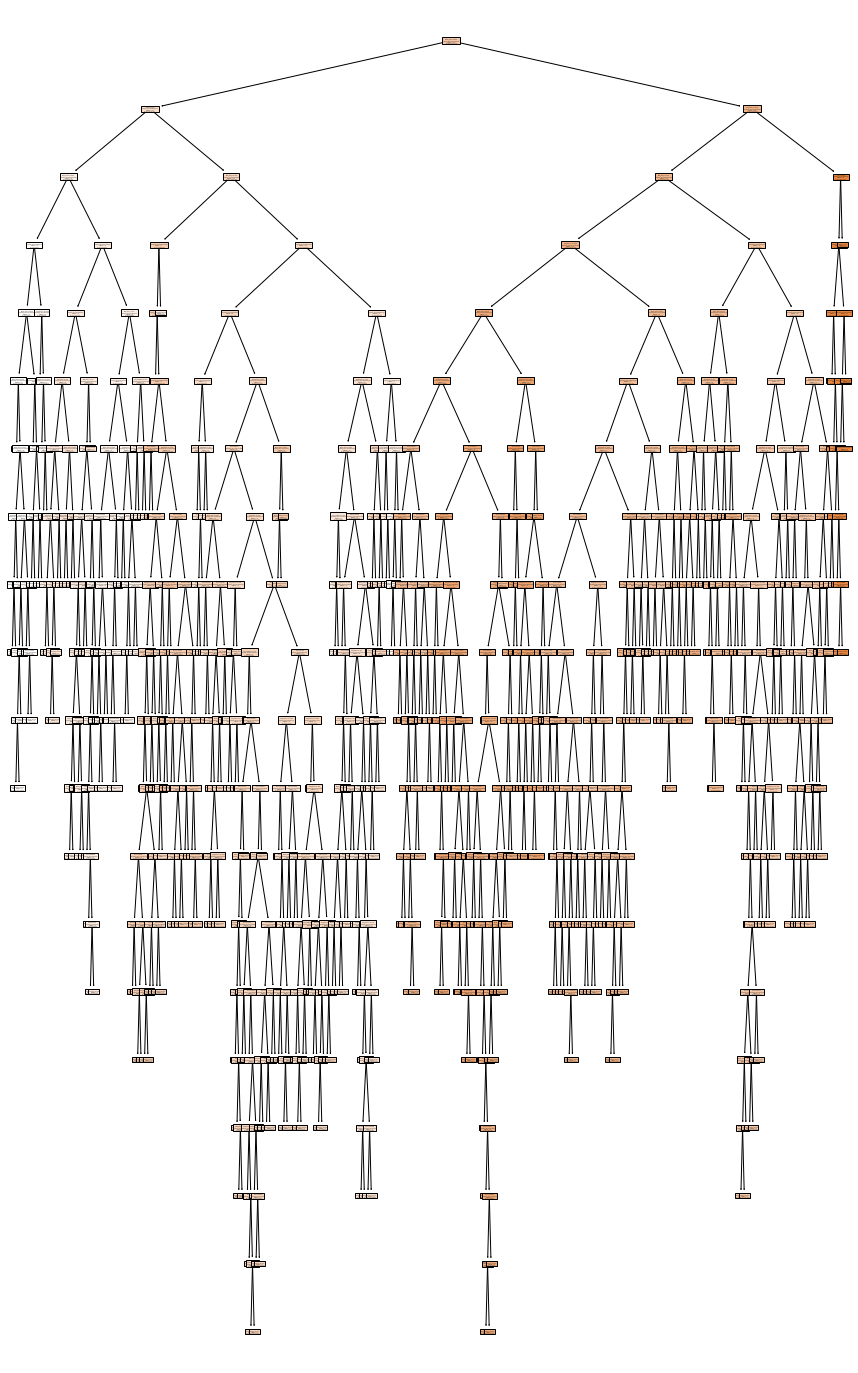

In [114]:
fig = plt.figure(figsize=(15,25))
_= tree.plot_tree(model, feature_names=X.columns, filled=True)